In [9]:
# Importing necessary libraries and functions
import os
import numpy as np
import pickle
from statistics import stdev, StatisticsError


from simulation.graph_utils import convert_maze
from simulation.simulation import Simulation, Algorithm

In [10]:
def calculate_stats(data):
    if len(data) > 1:
        try:
            avg = np.mean(data)
        except:
            avg = 0
        try:
            std_dev = stdev(data)
        except:
            std_dev = 0  # Handle cases where stdev can't be computed
    else:
        avg = 0
        std_dev = 0
    return avg, std_dev

In [27]:
# Base Mazes Path
base_path = "mazes/"

# Choose maze size
# maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"

mazes_path = base_path + maze_type_path

# Define max number of agents
max_agents = 40
results = []

for agents in range(1,max_agents+1):
    count = 0
    agent_steps = []
    agent_pioneer_steps = []
    fraction_explored = []
    fraction_pioneer_explored = []
    for root, dirs, files in os.walk(mazes_path):
        for file in files:
            maze_path = os.path.join(root, file)
            graph, rows, columns = convert_maze(maze_path)
            starting_node_id = f"{rows},{columns}"
            is_maze = True
            
            simulation = Simulation(
                algorithm=Algorithm.SELF,
                n_agents=agents,
                graph=graph,
                starting_node_id=starting_node_id,
                is_maze=is_maze,
            )
            
            simulation.simulate(False,False)
            agent_steps.append(simulation.total_steps/ agents if agents > 0 else 0)
            agent_pioneer_steps.append(simulation.pionner_steps)
            fraction_explored.append(simulation.fraction_explored * 100)
            fraction_pioneer_explored.append(simulation.fraction_pionner * 100)
            count += 1
    print(agents)
    
    # Calculate average and standard deviation for steps and pioneer steps
    avg_steps, std_steps = calculate_stats(agent_steps)
    avg_pioneer_steps, std_pioneer_steps = calculate_stats(agent_pioneer_steps)
    avg_fraction, std_fraction = calculate_stats(fraction_explored)
    avg_fraction_pioneer, std_fraction_pioneer = calculate_stats(fraction_pioneer_explored)
    
    # Append the results to the results list
    results.append({
        'agents': agents,
        'avg_steps': avg_steps,
        'std_steps': std_steps,
        'avg_pioneer_steps': avg_pioneer_steps,
        'std_pioneer_steps': std_pioneer_steps,
        'avg_fraction':avg_fraction,
        'std_fraction':std_fraction,
        'avg_fraction_pioneer': avg_fraction_pioneer,
        'std_fraction_pioneer': std_fraction_pioneer,
    })

print(results)
            


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
[{'agents': 1, 'avg_steps': 1607.744, 'std_steps': 610.5581080266713, 'avg_pioneer_steps': 1607.744, 'std_pioneer_steps': 610.5581080266713, 'avg_fraction': 34.5015, 'std_fraction': 19.730006408043707, 'avg_fraction_pioneer': 65.9825, 'std_fraction_pioneer': 19.85774600895643}, {'agents': 2, 'avg_steps': 1516.764, 'std_steps': 568.9082586242914, 'avg_pioneer_steps': 1478.976, 'std_pioneer_steps': 628.8400293828446, 'avg_fraction': 40.926, 'std_fraction': 21.338723185296605, 'avg_fraction_pioneer': 68.791, 'std_fraction_pioneer': 19.34752732922272}, {'agents': 3, 'avg_steps': 1282.628, 'std_steps': 471.5397753808005, 'avg_pioneer_steps': 1394.88, 'std_pioneer_steps': 647.4305048686988, 'avg_fraction': 44.277, 'std_fraction': 21.865493252628053, 'avg_fraction_pioneer': 69.985, 'std_fraction_pioneer': 19.704657453287677}, {'agents': 4, 'avg_steps': 1361.37, 'std_steps': 482.71481

In [12]:
results_dir = "results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [28]:
# Save results in pickle

with open(f"results/{maze_type_path}_result.pkl", 'wb') as f:
    pickle.dump(results, f)

In [29]:
# Load results

# maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"


with open(f"results/{maze_type_path}_result.pkl", 'rb') as f:
    results = pickle.load(f)

print(results)

[{'agents': 1, 'avg_steps': 1607.744, 'std_steps': 610.5581080266713, 'avg_pioneer_steps': 1607.744, 'std_pioneer_steps': 610.5581080266713, 'avg_fraction': 34.5015, 'std_fraction': 19.730006408043707, 'avg_fraction_pioneer': 65.9825, 'std_fraction_pioneer': 19.85774600895643}, {'agents': 2, 'avg_steps': 1516.764, 'std_steps': 568.9082586242914, 'avg_pioneer_steps': 1478.976, 'std_pioneer_steps': 628.8400293828446, 'avg_fraction': 40.926, 'std_fraction': 21.338723185296605, 'avg_fraction_pioneer': 68.791, 'std_fraction_pioneer': 19.34752732922272}, {'agents': 3, 'avg_steps': 1282.628, 'std_steps': 471.5397753808005, 'avg_pioneer_steps': 1394.88, 'std_pioneer_steps': 647.4305048686988, 'avg_fraction': 44.277, 'std_fraction': 21.865493252628053, 'avg_fraction_pioneer': 69.985, 'std_fraction_pioneer': 19.704657453287677}, {'agents': 4, 'avg_steps': 1361.37, 'std_steps': 482.7148132840502, 'avg_pioneer_steps': 1333.008, 'std_pioneer_steps': 632.3636859126591, 'avg_fraction': 45.7075, 'std_

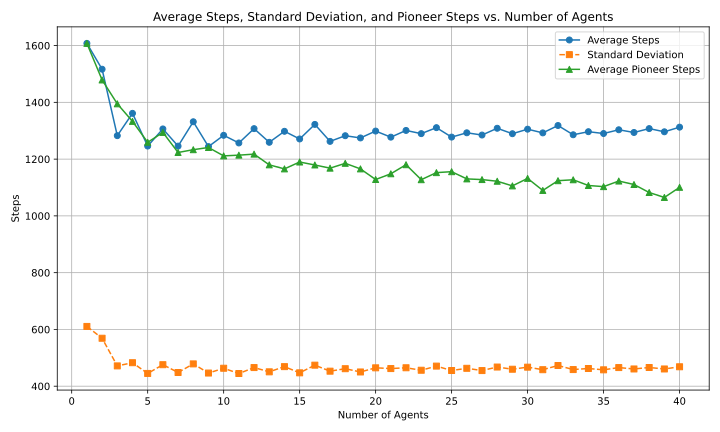

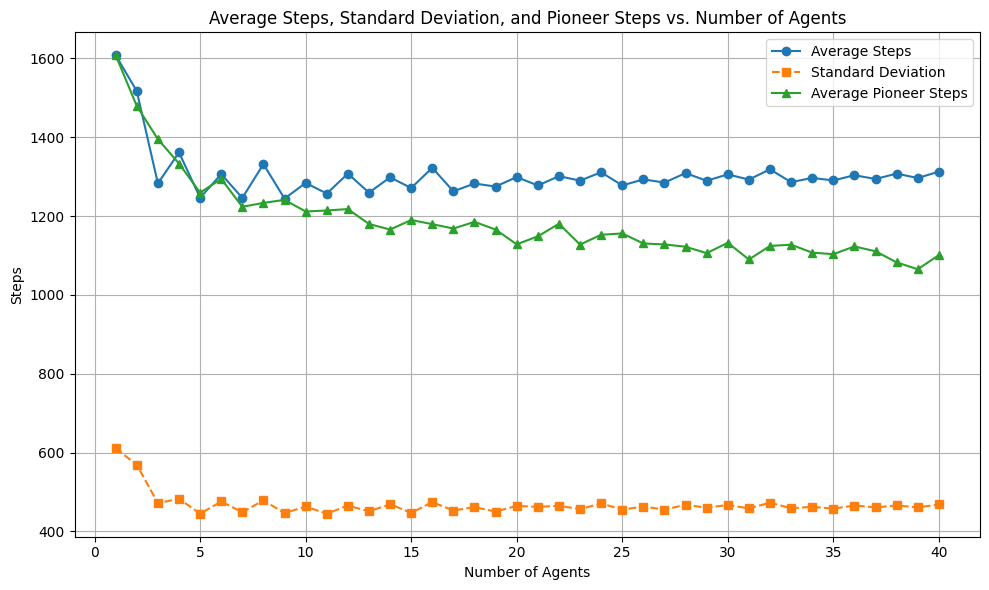

In [30]:
# Plot Steps Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in results]
avg_steps = [result['avg_steps'] for result in results]
std_steps = [result['std_steps'] for result in results]
avg_pioneer_steps = [result['avg_pioneer_steps'] for result in results]

# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting average steps
plt.plot(agents, avg_steps, label='Average Steps', marker='o')

# Plotting standard deviation of steps
plt.plot(agents, std_steps, label='Standard Deviation', linestyle='--', marker='s')

# Plotting average pioneer steps
plt.plot(agents, avg_pioneer_steps, label='Average Pioneer Steps', marker='^')

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Steps')
plt.title('Average Steps, Standard Deviation, and Pioneer Steps vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/steps_std_pioneer_vs_agents_{maze_type_path}.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


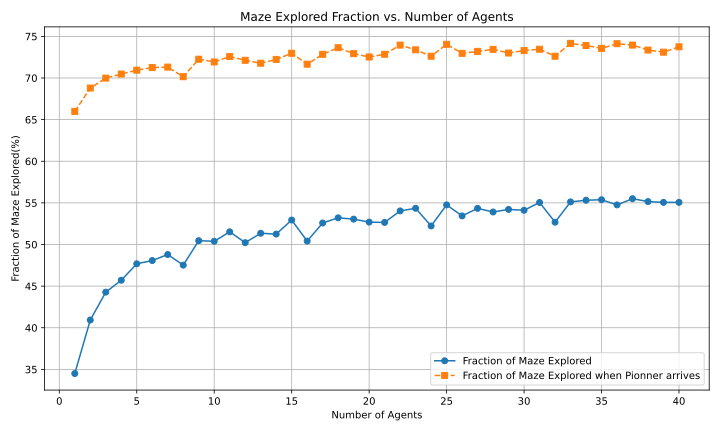

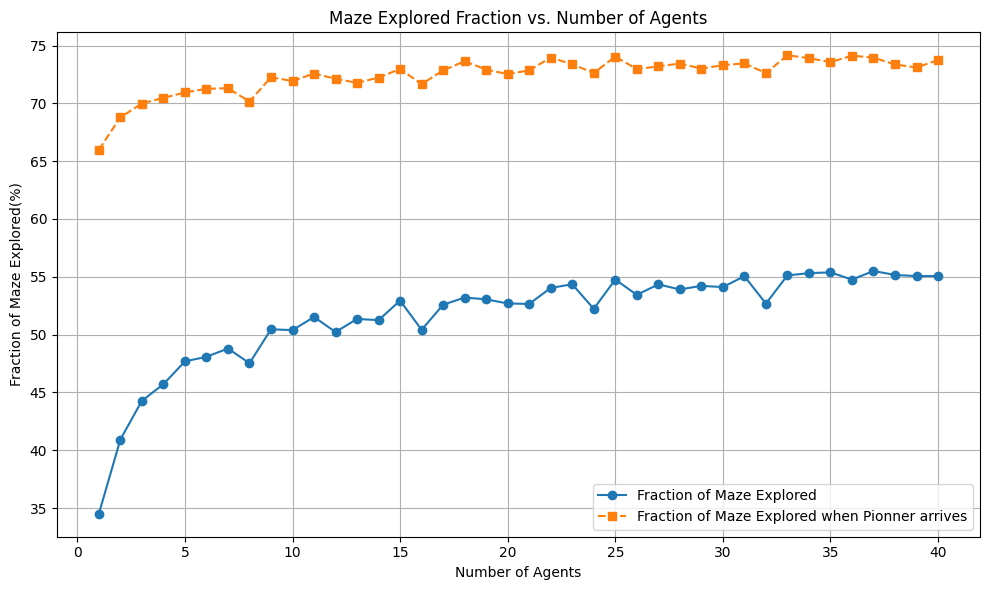

In [31]:
# Plot Fractio Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in results]
avg_fraction = [result['avg_fraction'] for result in results]
avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in results]


# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting average fraction
plt.plot(agents, avg_fraction, label='Fraction of Maze Explored', marker='o')

# Plotting average fraction
plt.plot(agents, avg_fraction_pioneer, label='Fraction of Maze Explored when Pionner arrives', linestyle='--', marker='s')

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Fraction of Maze Explored(%)')
plt.title('Maze Explored Fraction vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/fraction_vs_agents_{maze_type_path}.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))
